## Q-error and End-to-end Time

/tmp/ipykernel_1710315/2476166729.py:159: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_models * num_percentiles // 2)
/tmp/ipykernel_1710315/2476166729.py:186: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=num_models)


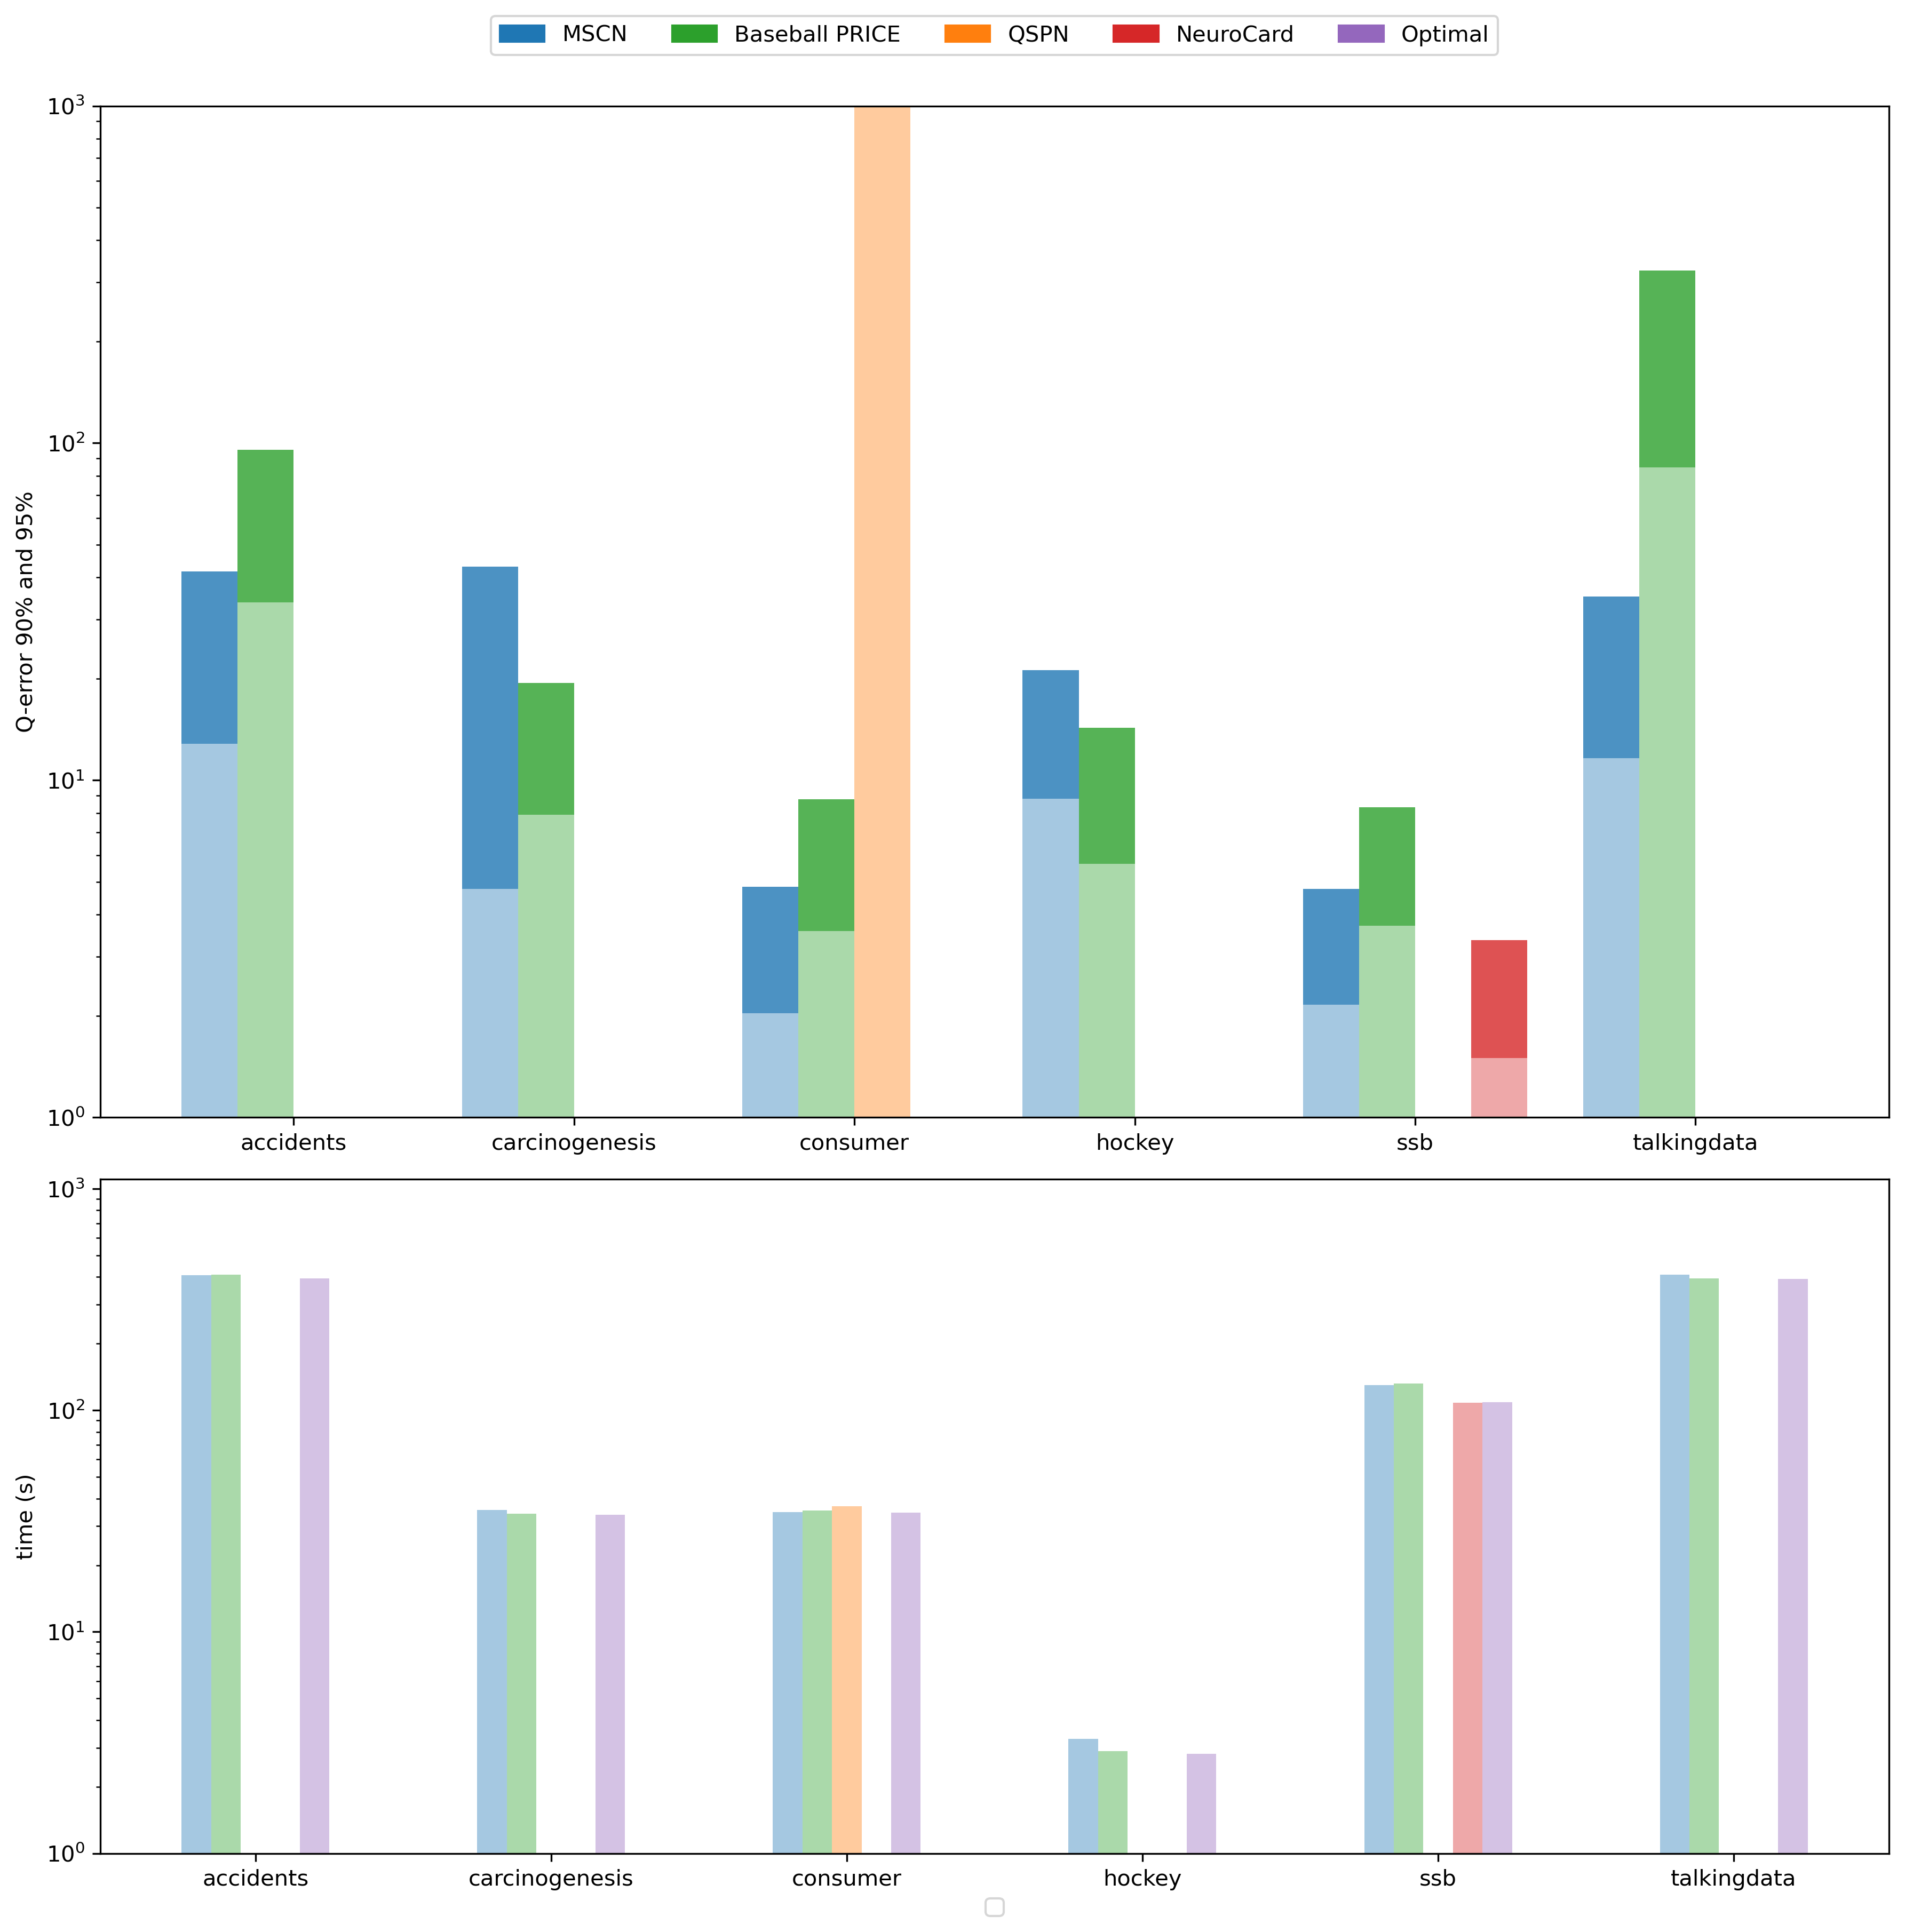

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# data
datasets = ['accidents', 'carcinogenesis', 'consumer', 'hockey', 'ssb', 'talkingdata']
models = ['MSCN', 'Baseball PRICE', 'QSPN', 'NeuroCard']
percentiles = ['90%', '95%']
data = {
    'accidents': {
        'MSCN': [12.85, 28.76],
        # 'PG': [32657.17, 254496.89],
        'Baseball PRICE': [33.64, 62.03],
        'QSPN': [1e-6, 1e-6],
        'NeuroCard': [1e-6, 1e-6]
    },
    'carcinogenesis': {
        'MSCN': [4.76, 38.28],
        # 'PG': [1558.02, 5615.88],
        'Baseball PRICE': [7.89, 11.58],
        'QSPN': [1e-6, 1e-6],
        'NeuroCard': [1e-6, 1e-6]
    },
    'consumer': {
        'MSCN': [2.04, 2.80],
        # 'PG': [1588.26, 5224.73],
        'QSPN': [9810.0, 64798.0],
        'Baseball PRICE': [3.57, 5.22],
        'NeuroCard': [1e-6, 1e-6]
    },
    'hockey': {
        'MSCN': [8.82, 12.36],
        # 'PG': [830.70, 2730.30],
        'Baseball PRICE': [5.66, 8.63],
        'QSPN': [1e-6, 1e-6],
        'NeuroCard': [1e-6, 1e-6]
    },
   'ssb': {
        'MSCN': [2.16, 2.61],
        # 'PG': [1655.4175, 6304.4467],
        'NeuroCard': [1.5, 1.85],
        'Baseball PRICE': [3.70, 4.61],
        'QSPN': [1e-6, 1e-6]
    },
    'talkingdata': {
        'MSCN': [11.63, 23.45],
        # 'PG': [103797.13, 727204.77],
        'Baseball PRICE': [84.59, 240.64],
        'QSPN': [1e-6, 1e-6],
        'NeuroCard': [1e-6, 1e-6]
    }
}

E2E_models = ['MSCN', 'Baseball PRICE', 'QSPN', 'NeuroCard', 'Optimal']

time_data = {
    'accidents': {
        'MSCN': 408.06,
        'Optimal': 395.01,
        'Baseball PRICE': 410.70,
        'NeuroCard': 1e-6,
        'QSPN': 1e-6
    },
    'carcinogenesis': {
        'MSCN': 35.57,
        'Optimal': 33.73,
        'Baseball PRICE': 34.23,
        'NeuroCard': 1e-6,
        'QSPN': 1e-6
    },
    'consumer': {
        'MSCN': 34.69,
        'Optimal': 34.50,
        'Baseball PRICE': 35.27,
        'NeuroCard': 1e-6,
        'QSPN': 37.01
    },
    'hockey': {
        'MSCN': 3.28,
        'Optimal': 2.81,
        'Baseball PRICE': 2.89,
        'NeuroCard': 1e-6,
        'QSPN': 1e-6
    },
    'ssb': {
        'MSCN': 129.70,
        'Optimal': 109.03,
        'Baseball PRICE': 131.98,
        'NeuroCard': 108.18,
        'QSPN': 1e-6
    },
    'talkingdata': {
        'MSCN': 410.73,
        'Optimal': 391.25,
        'Baseball PRICE': 394.76,
        'NeuroCard': 1e-6,
        'QSPN': 1e-6
    }
}

# parameters
num_categories = len(datasets)
num_models = len(models)
num_percentiles = len(percentiles)
bar_width = 0.2
index = np.arange(num_categories)

# dpi
plt.rcParams['figure.dpi'] = 300

# color
model_colors = {
    'MSCN': '#1f77b4',  # blue
    'QSPN': '#ff7f0e',    # orange
    'Baseball PRICE': '#2ca02c',  # green
    'NeuroCard': '#d62728',  # red
}

e2e_model_colors = {
    'MSCN': '#1f77b4',  # blue
    'QSPN': '#ff7f0e',    # orange
    'Baseball PRICE': '#2ca02c',  # green
    'NeuroCard': '#d62728',  # red
    'Optimal': '#9467bd'  # purple
}

percentile_alpha = {
    '90%': 0.4,
    '95%': 0.8
}

# draw
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 2]})
epsilon = 1e-6

# 
legend_labels = [f'{model}' for model in E2E_models]
legend_handles = [plt.Rectangle((0,0),1,1,color=e2e_model_colors[model]) for model in E2E_models]


for i, model in enumerate(models):
    bottoms = np.zeros(num_categories)
    for j, percentile in enumerate(percentiles):
        values = [data[dataset][model][j] + epsilon for dataset in datasets]
        ax1.bar(
            index + i * bar_width, 
            values, 
            bar_width, 
            # label=f'{model}' if j == 0 else "", 
            bottom=bottoms,
            color=model_colors[model],
            alpha=percentile_alpha[percentile]
        )
        bottoms += np.array(values)

# ax.set_xlabel('categories')
ax1.set_ylabel('Q-error 90% and 95%')
ax1.set_xticks(index + bar_width * (num_models - 1) / 2)
ax1.set_xticklabels(datasets)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_models * num_percentiles // 2)

ax1.set_yscale('log')
ax1.set_ylim(bottom=1, top=1e3)

num_categories = len(datasets)
num_models = len(E2E_models)
bar_width = 0.1
index = np.arange(num_categories)

for i, model in enumerate(E2E_models):
    values = [time_data[dataset][model] for dataset in datasets]
    ax2.bar(
        index + i * bar_width, 
        values, 
        bar_width, 
        # label=E2E_models[i],
        color=e2e_model_colors[model],
        alpha=0.4
    )
    
# ax2.set_xlabel('类别')
ax2.set_ylabel('time (s)')
ax2.set_yscale('log')
ax2.set_ylim(bottom=1)
ax2.set_xticks(index + bar_width * (num_models - 1) / 2)
ax2.set_xticklabels(datasets)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=num_models)

ax1.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=num_models)

plt.tight_layout()
plt.savefig('qerrors_and_E2E_times.pdf', format='pdf', bbox_inches='tight')
plt.show()

## training times

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

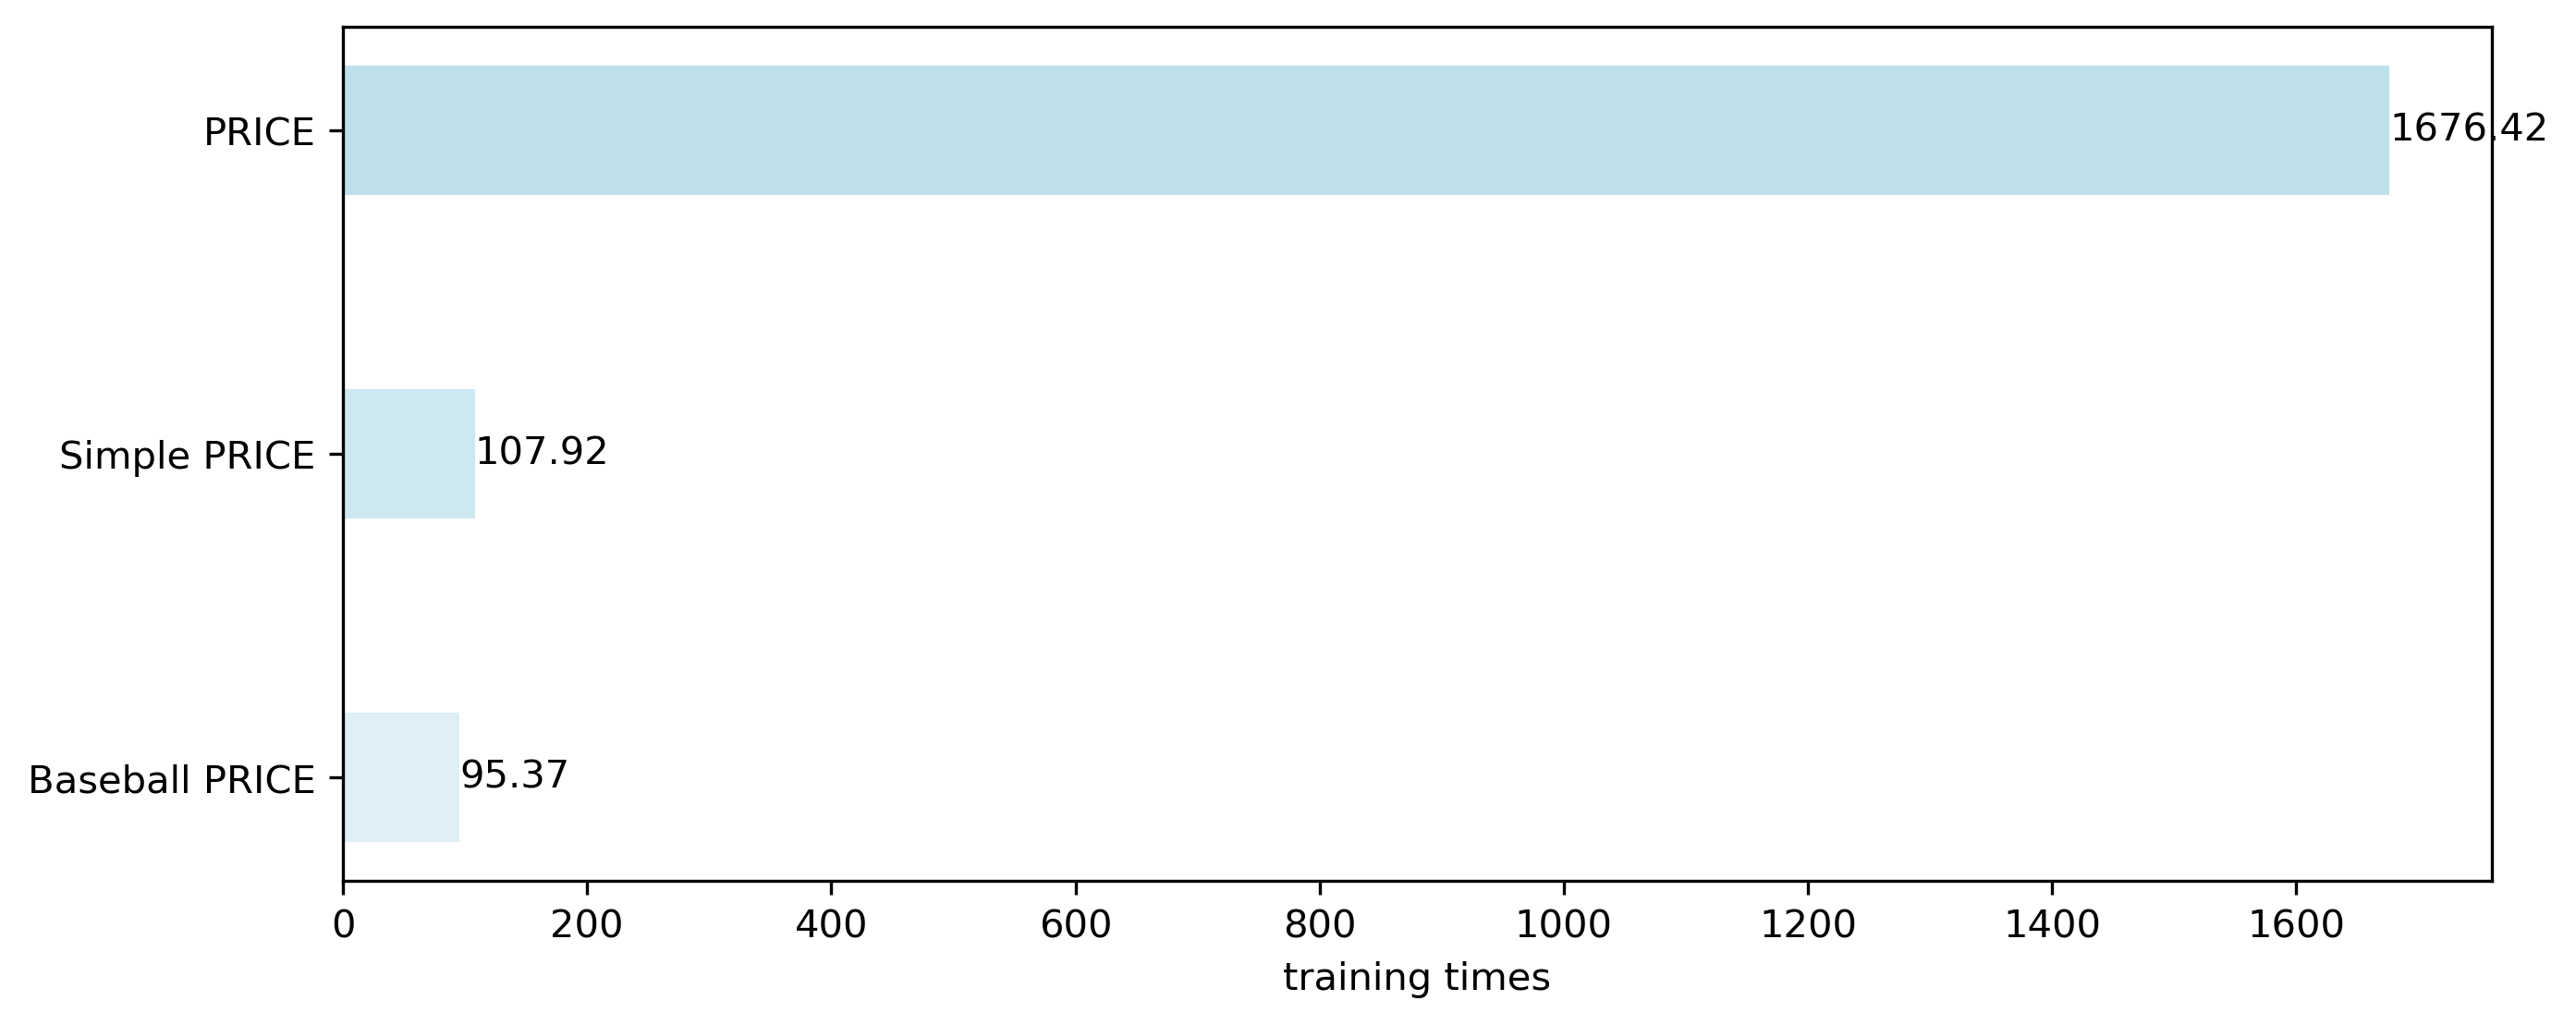

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

# 定义训练时间数据
training_data = [
    ("PRICE", "2025-05-20 16:16:47", "2025-05-21 20:13:12"),
    ("Simple PRICE", "2025-05-15 19:08:23", "2025-05-15 20:56:18"),
    ("Baseball PRICE", "2025-05-22 11:32:53", "2025-05-22 13:08:15")
]

# 计算训练时长（以秒为单位）
durations = []
for _, start_time, end_time in training_data:
    start = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
    end = datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S")
    duration = (end - start).total_seconds()
    durations.append(duration)

# 将时长转换为分钟
durations = [d / 60 for d in durations]

# 提取训练类型
training_types = [data[0] for data in training_data]

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置 matplotlib 支持中文
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 透明度列表
alphas = [0.4, 0.6, 0.8]

# 创建更宽的图形，增加高度方向的空间
plt.figure(figsize=(10, 4))  # 调整宽度和高度

# 绘制横向柱状图，使用浅蓝色并设置不同透明度
for i in range(len(training_types)):
    plt.barh(
        training_types[len(training_types) - 1 - i], 
        durations[len(durations) - 1 - i],
        color=(0.68, 0.85, 0.90), 
        alpha=alphas[i], 
        height=0.4  # 增加高度，减少紧凑感
    )

# 设置 x 轴标签
plt.xlabel('training times')
# 去掉 y 轴标签
plt.ylabel('')

# 添加数据标签
for i, v in enumerate(durations):
    plt.text(v, len(durations) - 1 - i, f'{v:.2f}', ha='left', va='center')

# 调整子图参数，设置适当的垂直间距
plt.subplots_adjust(hspace=0.1)

plt.savefig('training_times.pdf', format='pdf', bbox_inches='tight')
# 显示图形
plt.show()